<a href="https://colab.research.google.com/github/ttcielott/Deep-Learning-with-PyTorch/blob/main/Chapter4_Under_the_hood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Coders with Fastai and PyTorch
by Jeremy Howard and Sylvain Gugger

## Chapter 4. Under the Hood: Training a Digit Classifier

This notebook will write a summary of chapter 4 and run the codes for practice. The chapter explains how deep learning works under the hood.
The chapter 4 comprises of 9 parts as below.


1.   Pixels: The Foundations of Computer Vision
2.   First Try: Pixel Simialarity
3.   Computing Metrics Using
4.   Stochastic Gradient Descent
5.   The MNIST Loss Function
6.   Putting It All Together
7.   Adding Nonlinearity
8.   Jargon Recap
9.   Questionnaire




In [2]:
# import fastai library

from fastai.vision.all import *
import pandas as pd

## 1. Pixels: The Foundations of Computer Vison

To understand what happens in a computer vision, we first have to understand how computers handle images.

Dataset for this tutorial: MNIST samples

**About MNIST dataset** 

images of handwritten digits, collected by the National Institute of Standards and Technology and collated into a machine learning dataset by Yann Lecun and his colleqgues.

In [3]:
# download a sample of MNIST
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
# view what's in this directory by using ls
# ls, a method added by fastai
# returns an object of a special fastai class called L (similar to Python List)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

The MNIST dataset follows a common layout for machine learning dataset:

*   training set folder
*   validation set folder



In [5]:
# view what's inside the training set (folder, train)
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

There's a folder of 3s and a folder of 7s.

In [6]:
# look in folders
# sort the file to get the same order of files
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
# pick one file path
im3_path = threes[1]
im3_path

Path('/root/.fastai/data/mnist_sample/train/3/10000.png')

In [8]:
# open the file using Image class
# Image class is from the Python Image Library, PIL
# PIL is for opening, manipulation, and viewing images
im3 = Image.open(im3_path)
im3

###"Convert a image to a Numpy array or a PyTorch tensor."

**Why is the conversion necessary?**

because everything is represented as a number in a computer.

In [9]:
# get a section of the image
# see how it looks like converted to a Numpy array
array(im3)[:10, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224],
       [  0,   0,   0,   0,   0,  93, 244, 249, 253, 187],
       [  0,   0,   0,   0,   0, 107, 253, 253, 230,  48],
       [  0,   0,   0,   0,   0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
# view how the image is created from the pixel values

# convert the image to a tensor
im3_t = tensor(im3)

# convert it to pandas dataframe
df = pd.DataFrame(im3_t[5:20, 5:20])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0
1,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0
2,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0
3,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0
4,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0
5,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0
6,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0
7,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0
8,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2
9,0,0,0,0,0,0,43,98,98,208,253,253,253,253,187


In [11]:
# color-code the values using a gradient
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0
1,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0
2,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0
3,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0
4,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0
5,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0
6,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0
7,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0
8,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2
9,0,0,0,0,0,0,43,98,98,208,253,253,253,253,187


*   the number 0 : white
*   the number 255 : black
*   0 ~ 255 : grey shades


**Our goal: create a model that can recognize 3s and 7s.** How can you do it?




## 2.   First Try: Pixel Simialarity

1.   find the average pixel value for every pixel of the 3s.
2.   do the same for the 7s.
2.   see of which these two ideal digits the image is most similar to.



In [12]:
# we already have a variable of L object, a list of paths of the image 3s
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [13]:
# create a tensor containing all of our 3s stacked together
# using Python List Comprehension
three_tensors = [tensor(Image.open(o)) for o in threes]

Reminder : How to Convert an Image file to a Tensor

1. read the image file with Image.open.
2. convert it to a tensor.


> tensor(Image.open(image file path))



In [14]:
# do the same for 7s
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [15]:
# check the length of list
len(three_tensors), len(seven_tensors)

(6131, 6265)

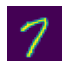

In [16]:
# display a tensor as a image using fastai's show_image function
show_image(seven_tensors[10])

In [17]:
# compute the average over all the images of the intensity of that pixel

# combine all the images in the list into a single 3-dimensional tensor (rank-3 tensor)
torch.stack(three_tensors).shape

torch.Size([6131, 28, 28])

shape attribute tells you the length of each axis.

The semantics of a tensor are up to us. As far as PyTorch is concerned, it is just a bunch of numbers in memory.

In [18]:
# rank: length of a tensor's shape
len(torch.stack(three_tensors).shape)

3

**rank** : the number of axes or dimensions in a tensor

**shape** : the size(length) of each axis of a tensor

In [19]:
# usually when images are floats, the pixel values are expected to be between 0 and 1
# therefore, let's make them as float and divide them by 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255

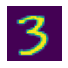

In [22]:
# display a tensor as a image
show_image(seven_tensors[10])

In [24]:
# another way to check a tensor's rank
stacked_threes.ndim

3

torch.stack function's default axis is 0. 

Regarding how it stacks tensors, please refer to the following stackoverflow page.

https://stackoverflow.com/questions/69220221/use-of-torch-stack

In [26]:
# calculate the mean of all the image tensors by taking the mean along dimension 0 of the stacked, rank-3 tensor
mean3 = stacked_threes.mean(0)
mean3.shape

torch.Size([28, 28])

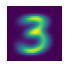

In [28]:
# according to this dataset, this is the ideal number 3
show_image(mean3)

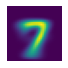

In [29]:
# do the same for 7s
mean7 = stacked_sevens.mean(0)
show_image(mean7)

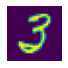

In [30]:
# let's pick an arbitrary 3 and measure its distance from our "ideal digits" (mean3 and mean7)
random3 = stacked_threes[12]
show_image(random3)

**How can we determine its distance from our ideal 3?**

We can't just add up the differences between the pixels of this images and the ideal digit because some differences will be positive, while others will be negative, and these differences will cancel out. 

**Two Main Ways**

*   Mean Absolute Difference (or L1 norm)
*   Root Mean Squared Error (or L2 norm)

In [34]:
# take the mean of  the absolute value of differences
L1_norm = (random3 - mean3).abs().mean()

# tkae the mean of the square of differences
# and then take the square root (which undoes the squaring)
L2_norm = ((random3 - mean3)**2).mean().sqrt()
L1_norm, L2_norm

(tensor(0.1286), tensor(0.2366))

In [36]:
# let's see random3's distance from the ideal 7 tensor
L1_norm_cf = (random3 - mean7).abs().mean()
L2_norm_cf = ((random3 - mean7)**2).mean().sqrt()
L1_norm_cf, L2_norm_cf

(tensor(0.1534), tensor(0.2920))

In both cases, the distance between our 3 and the ideal 3 is less than the distance to the ideal 7, so our simple model will give the right prediction in this case.

**PyTorch's loss functions**
PyTorch already provides both of these as loss functions


```
import torch.nn.functional as F # is available by default under that name in fastai
F.l1_loss(random3.float(), mean7)
F.mse_loss(random3, mean7).sqrt()
```

In [38]:
# we don't have to import Pytorch loss function
# as it is available by default under F in fastai

F.l1_loss(random3.float(), mean7), F.mse_loss(random3, mean7).sqrt()

(tensor(0.1534), tensor(0.2920))

**The Difference between L1 norm and Mean Squared Error (MSE)**

MSE will penalize bigger mistakes more heavily and be more lenient with small mistakes than L1 norm.

**NumPy Arrays VS PyTorch Tensors**

NumPy provides similar functionality and similar API to that provided by Pytorch; 

however, it does **NOT** support using the **GPU** or **calculating gradients**, which are both critical for deep learning.

